In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp, solve_bvp
from scipy.optimize import minimize

# Problem 1

Suppose that, in a city of approximately three million, five people who have just become infectious have recently 
entered the city carrying a certain disease. Each of those individuals has one contact each day that could spread 
the disease, and an average of three days is spent in the infectious state. Find the solution of the corresponding
SIR equations using solve_ivp for fifty days, where each time period is half a day, and plot your results. Use the percentages 
of each state, not the actual number of people in the state. 

At the peak of the infection, how many in the city will still be able to work (assume for simplicity that those who are in the infectious state either cannot go to work or are unproductive, etc.)?

Hint: Use the t-values paramter in solve_ivp to pass in an array of t-values.

In [7]:
def prob1(beta=1, gamma=1/3, title="Problem 1", t_range=np.array([0,50])):
    #define the ode
    def ode(t,y):
        return np.array([-beta*y[1]*y[0], beta*y[1]*y[0] - (gamma)*y[1], gamma*y[1]])
    #the t_range and corresponding array
    t0 = t_range[0]
    tf = t_range[1]
    t_array = np.arange(t0,tf,1)
    #initial values
    y0 = np.array([3e6/(3e6+5),5/(3e6+5),0])
    #get the solution on the t_values
    sol = solve_ivp(ode,(t0,tf),y0, t_eval=t_array)
    #get the answers to the questions
    result_arg = np.argmax(sol.y[1])
    results = sol.y[0][result_arg]+sol.y[2][result_arg]
    #plot the results
    fig = plt.figure(1)
    ax = fig.add_subplot(111)
    ax.set_xlim([0,50])
    ax.set_ylim([-0.1,1.1])
    ax.set_xlabel("T(Days)")
    ax.set_ylabel("Proportion of Population")
    ax.set_title(title)
    plt.plot(t_array,sol.y[0],label='Susceptible')
    plt.plot(t_array,sol.y[1],label='Infected')
    plt.plot(t_array,sol.y[2],label='Recovered')
    ax.legend(loc='center right')
    plt.show()
    return results

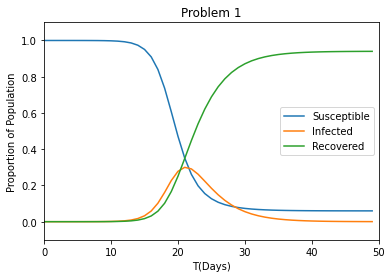

2100165 can still work at peak
This answer assumes that everyone who is not sick can work


In [8]:
results = prob1()
print("{} can still work at peak".format(int(np.round(results*3e6, 0))))
print("This answer assumes that everyone who is not sick can work")

# Problem 2

On March 11, 2020, New York City had 52 confirmed cases of Covid-19. On that day New York started its 
lock-down measures. Using the following information, model what the spread of the virus could have 
been if New York did not implement any measures to curb the spread of the virus over the next 150 days:
    there are approximately 8.399 million people in New York city,
    the average case of Covid-19 lasts for 10 days, 
    and each infected person can spread the virus to 2.5 people.

Plot your results for each day.

1) At the projected peak, how many concurrent active cases are there?

2) Assuming that about 5% of Covid-19 cases require hospitalization, and using the fact that there are 
about 58,000 hospital beds in NYC, how much over capacity will the hospitals in NYC be at the projected peak?

In [17]:
def prob2(beta=2.5/10, gamma=1/10, title="Modeling Covid-19 in NYC", t_range=np.array([0,150])):
    '''
    Using the SIR model, plot a graph that models the
    spead of a disease in NYC and answer the questions.
    1. the projected peak concurent cases
    2. capacity deficit at the projected peak

    returns:
        ans1, ans2: answers to questions 1 and 2
    '''
    #define the ode
    def ode(t,y):
        return np.array([-beta*y[1]*y[0], beta*y[1]*y[0] - (gamma)*y[1], gamma*y[1]])
    #the t_range and corresponding array
    t0 = t_range[0]
    tf = t_range[1]
    t_array = np.arange(t0,tf,1)
    #initial values
    y0 = np.array([(8.399e6-52)/(8.399e6),52/(8.399e6),0/8.399e6])
    #get the solution on the t_values
    sol = solve_ivp(ode,(t0,tf),y0, t_eval=t_array)
    #get the answers to the questions
    max_arg = np.argmax(sol.y[1])
    results_1 = int(np.round(sol.y[1][max_arg] * 8.399e6,0))
    results_2 = int(np.round((results_1 * 0.05) - 58000,0))
    #plot the results
    fig = plt.figure(2)
    ax = fig.add_subplot(111)
    ax.set_xlim([t0,tf])
    ax.set_ylim([-0.1,1.1])
    ax.set_xlabel("Days since Mar 11")
    ax.set_ylabel("Proportion of Population")
    ax.set_title(title)
    plt.plot(t_array,sol.y[0],label='Susceptible')
    plt.plot(t_array,sol.y[1],label='Infected')
    plt.plot(t_array,sol.y[2],label='Recovered')
    ax.legend(loc='upper left')
    plt.show()
    return results_1, results_2
    

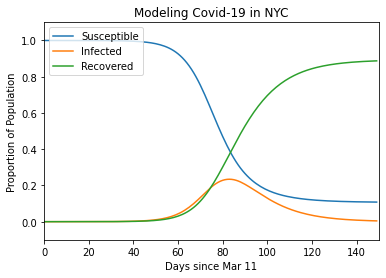

Number of concurrent active cases at peak: 1967560
Over Capacity by 40378 individuals


In [18]:
results=prob2()
print("Number of concurrent active cases at peak: {}".format(results[0]))
print("Over Capacity by {} individuals".format(results[1]))

# Problem 3

There are 7 billion people in the world. Suppose that influenza originates with 1000 people, and that they are contagious for 10 days before recovering.
Also suppose that on average someone makes one contact every two days that could spread the flu.
Since we can catch a new strain of the flu, suppose that a recovered individual becomes susceptible again with probability f=1/50. To assure a steady population, let the birth rate balance out the death rate, and in particular let μ=.0001.

Using the SIRS model above, plot the proportion of population that is Susceptible, Infected, and Recovered over a year span 365 days with one point for each day.

In [19]:
def prob3(f=1/50,mu=0.0001,gamma=1/10,beta=1/2):
    '''
    Use the SIRS model to examine the spread of the 
    flu over the course of a year
    '''
    #define the ode equation for SIRS
    def ode(t,y):
        one = f*y[2] + mu*(1-y[0]) - beta*y[1]*y[0]
        two = beta*y[1]*y[0] - (gamma+mu)*y[1]
        three = -f*y[2] + gamma*y[1] - mu*y[2]
        return np.array([one,two,three])
    #the t_range and corresponding array
    t0 = 0
    tf = 365
    t_array = np.arange(t0,tf,1)
    #initial values
    y0 = np.array([(7e9-1000)/(7e9),1000/(7e9),0])
    #get the solution on the t_values
    sol = solve_ivp(ode,(t0,tf),y0, t_eval=t_array)
    #plot the results
    fig = plt.figure(3)
    ax = fig.add_subplot(111)
    ax.set_xlim([t0,tf])
    ax.set_ylim([-0.1,1.1])
    ax.set_xlabel("Time(Days)")
    ax.set_ylabel("Proportion of Population")
    ax.set_title("World Sickness for a Year")
    plt.plot(t_array,sol.y[0],label='Susceptible')
    plt.plot(t_array,sol.y[1],label='Infected')
    plt.plot(t_array,sol.y[2],label='Recovered')
    ax.legend(loc='upper center')
    plt.show()

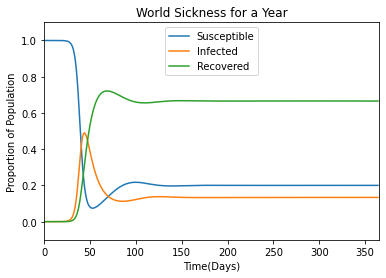

In [20]:
prob3()

# Problem 4

Fit the PGED model to the Covid-19 data provided in new_york_cases.npy.
Print the optimal values of alpha and T_G, and plot your results against 1-S(t).
Use one point for each day.

In [13]:
def prob4():
    '''
    Find the best parameters to fit the PEGD model
    to the data provided in new_york_cases.npy

    Plot the data against 1-S(t)
    '''
    #get the data from the file
    data = np.load('new_york_cases.npy')
    xs = data
    ys = np.arange(1,len(data)+1, 1)
    y0 = np.array([(8.399e6-52)/(8.399e6),52/(8.399e6),0/8.399e6])
    def ode_gen(alpha, T_G):
        def ode(t,y):
            return np.array([(-alpha/t) * y[1], ((alpha/t) - (1/T_G))*y[1], (1/T_G)*y[1]])
        return ode
    
    #define the model and parameters to optimize
    def opt_mod(params):
        alpha, T_G = params
        ode = ode_gen(alpha, T_G)
        sol = solve_ivp(ode,(1,len(ys)),y0, t_eval=ys)
        out = 1 - sol.y[0]
        #print(np.linalg.norm(out))
        diff = out-(xs/8.399e6)
        #must return a flow
        return np.linalg.norm(diff)
    
    p0 = (1,1)
    #get the "best" params
    results = minimize(opt_mod, p0)
    alpha, T_G = results.x
    print("alpha: {}".format(alpha))
    print("T_G: {}".format(T_G))
    ode = ode_gen(alpha, T_G)
    sol = solve_ivp(ode,(1,len(ys)),y0, t_eval=ys)
    #plot the results
    fig = plt.figure(4)
    ax = fig.add_subplot(111)
    ax.set_ylim([-0.001,0.0251])
    ax.set_title("Modeling NYC covid cases with SIR")
    ax.set_ylabel("Proportion of Population")
    ax.set_xlabel("Days Since Mar 11")
    plt.plot(ys,xs/8.399e6,label='data')
    plt.plot(ys,1-sol.y[0],label='1-S(t)')
    ax.legend(loc="upper left")

alpha: 2.530782078773525
T_G: 16.97321386964178


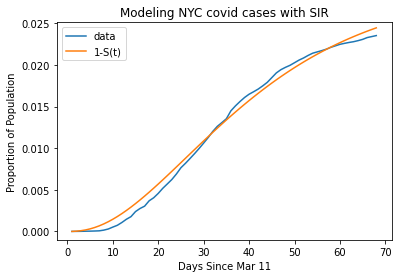

In [14]:
prob4()

# Problem 5

In [15]:
def prob5():
    '''
    Use solve_bvp to model the measles boundary value
    problem
    '''
    beta_0=1575
    beta_1=1
    nu=0.01
    lamd=0.0279
    mu=0.02
    def beta_t(t, beta_0=beta_0, beta_1=beta_1):
        return beta_0*(1 + beta_1 * np.cos(2*np.pi* t))
    
    #define the ode
    def ode(t,y):
        one = mu - beta_t(t)*y[0]*y[2]
        two = beta_t(t)*y[0]*y[2] - y[1]/lamd
        three = y[1]/lamd - y[2]/nu
        return np.array([one,two,three,np.zeros(len(y[3])),np.zeros(len(y[4])),np.zeros(len(y[5]))])
    #define the boundary condtions    
    def bcs(ya,yb):
        BCa = ya[0:3]-ya[3:]
        BCb = yb[0:3]-yb[3:]
        return np.hstack([BCa, BCb])
        
    #define the x-axis    
    t = np.linspace(0.0,1.0,200)
    #define the y-axis initial guess stuff
    y = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01]).reshape((-1,1))*np.ones((6, len(t)))
    
    sol = solve_bvp(ode, bcs, t, y)
    #print(sol)
    #get the plotting stuff from the solution
    y_S = sol.sol(t)[0]
    y_E = sol.sol(t)[1]
    y_I = sol.sol(t)[2]
    fig = plt.figure(5)
    ax = fig.add_subplot(111)
    ax.set_xlim([-0.1,1.1])
    ax.set_ylim([-0.001, 0.081])
    ax.set_xlabel("Proportion of Population")
    ax.set_ylabel("Time(Years)")
    ax.set_title("Problem 5")
    plt.plot(t,y_S,label='Susceptible')
    plt.plot(t,y_E,label='Exposed')
    plt.plot(t,y_I,label='Infectious')
    ax.legend(loc='center right')
    plt.show()

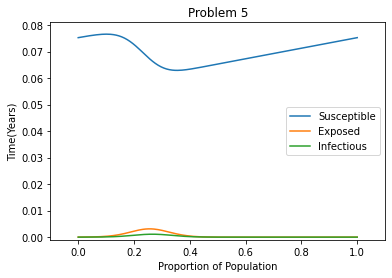

In [16]:
prob5()